<a href="https://colab.research.google.com/github/kaushik3012/High-Dimensional-Multivariate-Visualisation/blob/main/Multivariate_Visualization_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Axis based Visualization

## Scatterplot Matrix (SPLOM)

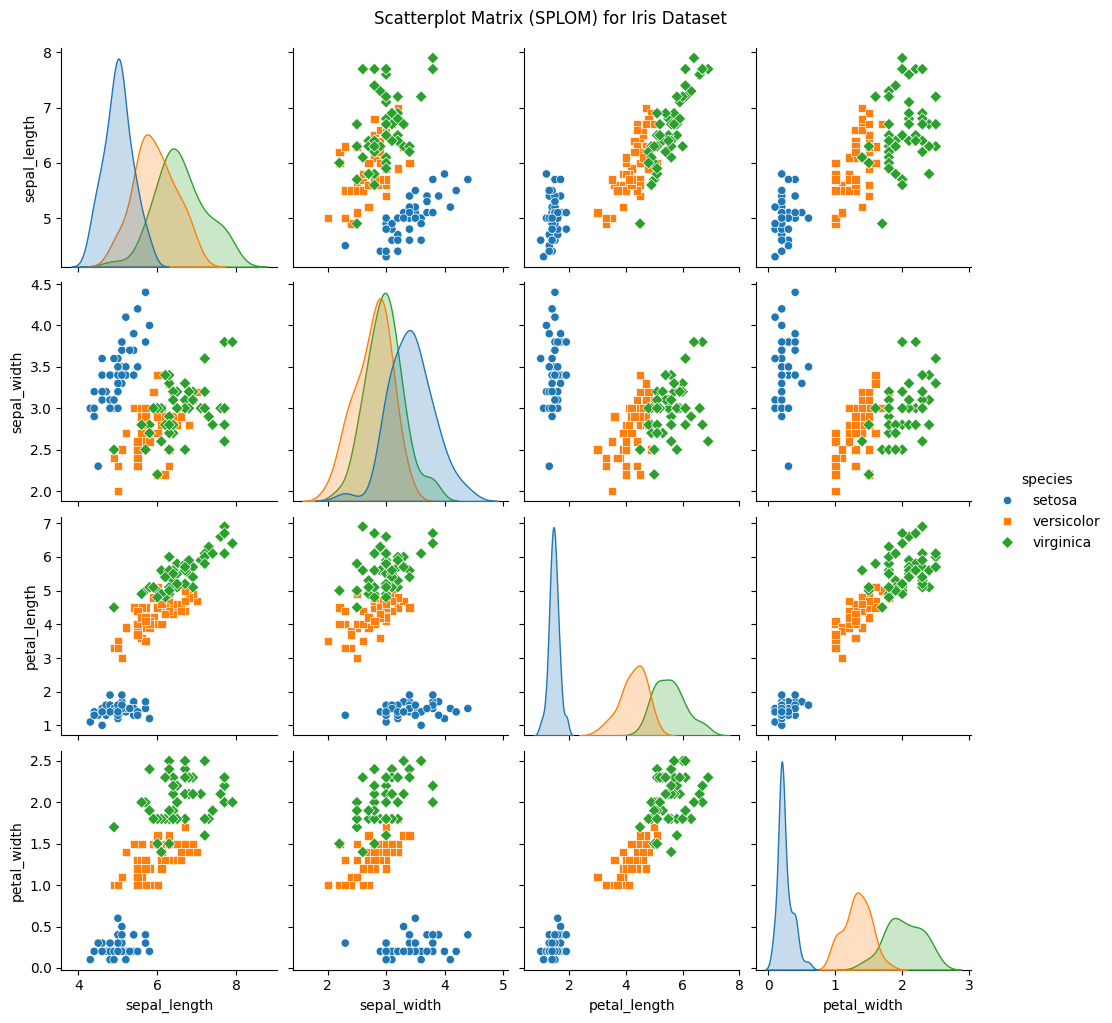

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = sns.load_dataset("iris")

# Create a scatterplot matrix using seaborn
sns.pairplot(iris, hue='species', markers=["o", "s", "D"])
plt.suptitle("Scatterplot Matrix (SPLOM) for Iris Dataset", y=1.02)
plt.show()

## Parallel Coordinates Plot (PCP)

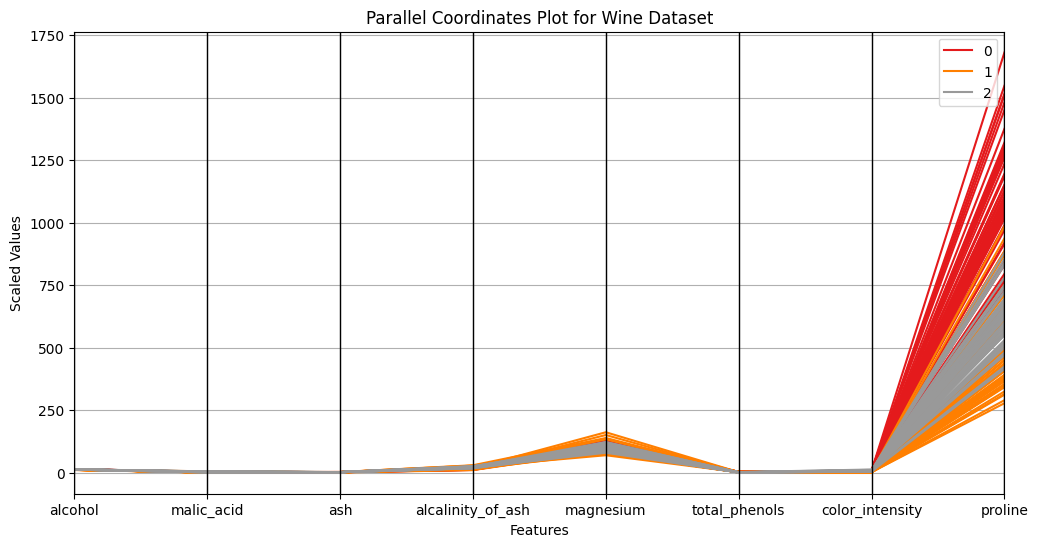

In [12]:
import pandas as pd
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load the Wine dataset
wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target
wine_df.drop(['flavanoids',	'nonflavanoid_phenols',	'proanthocyanins',	'od280/od315_of_diluted_wines', 'hue'],axis=1, inplace=True)

# Create a parallel coordinates plot
plt.figure(figsize=(12, 6))
parallel_coordinates(wine_df, 'target', colormap=plt.get_cmap("Set1"))
plt.title("Parallel Coordinates Plot for Wine Dataset")
plt.xlabel("Features")
plt.ylabel("Scaled Values")
plt.show()

## Radial Coordinate Visualizations (RadViz)

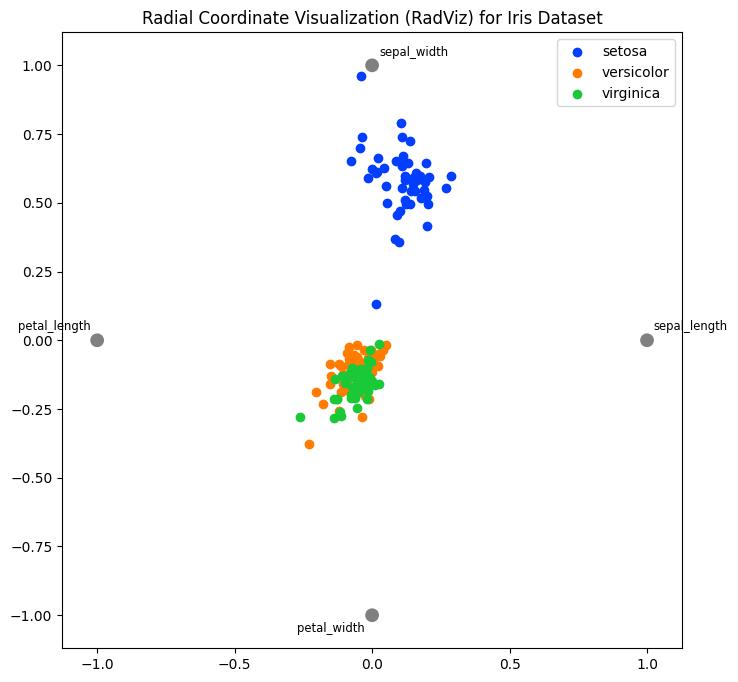

In [13]:
from pandas.plotting import radviz

plt.figure(figsize=(8, 8))
radviz(iris, 'species', color=sns.color_palette("bright"))
plt.title("Radial Coordinate Visualization (RadViz) for Iris Dataset")
plt.show()

## Star Plot

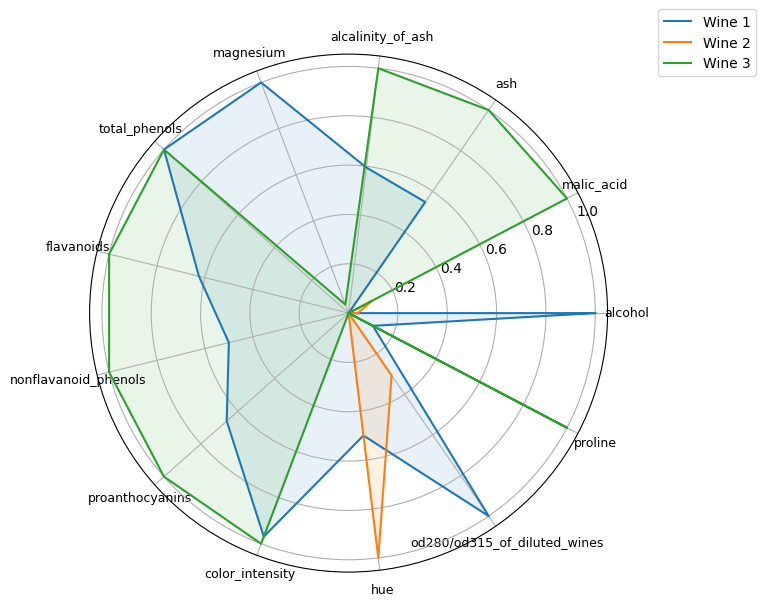

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# Select the first 3 samples for the star plot
samples = X.iloc[:3]
labels = [f"Wine {i+1}" for i in range(3)]

# Number of variables
num_vars = len(samples.columns)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the circle

# Normalize data (0 to 1 for each feature)
samples_normalized = (samples - samples.min()) / (samples.max() - samples.min())

# Start plotting
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each sample
for i, row in samples_normalized.iterrows():
    values = row.tolist()
    values += values[:1]  # complete the circle
    ax.plot(angles, values, label=labels[i])
    ax.fill(angles, values, alpha=0.1)

# Set the variable labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(wine.feature_names, fontsize=9)

# Add legend and title
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

## Andrews Curves

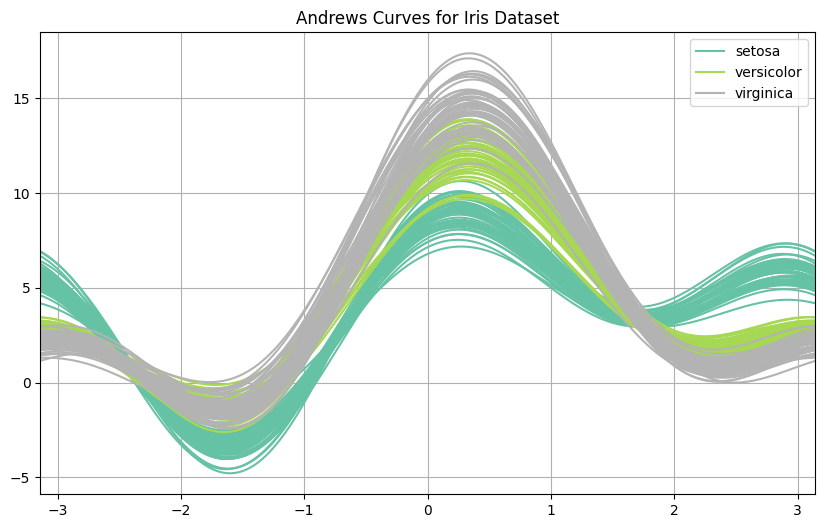

In [14]:
from pandas.plotting import andrews_curves

plt.figure(figsize=(10, 6))
andrews_curves(iris, 'species', colormap=plt.get_cmap("Set2"))
plt.title("Andrews Curves for Iris Dataset")
plt.show()

## Hyperbox Plot

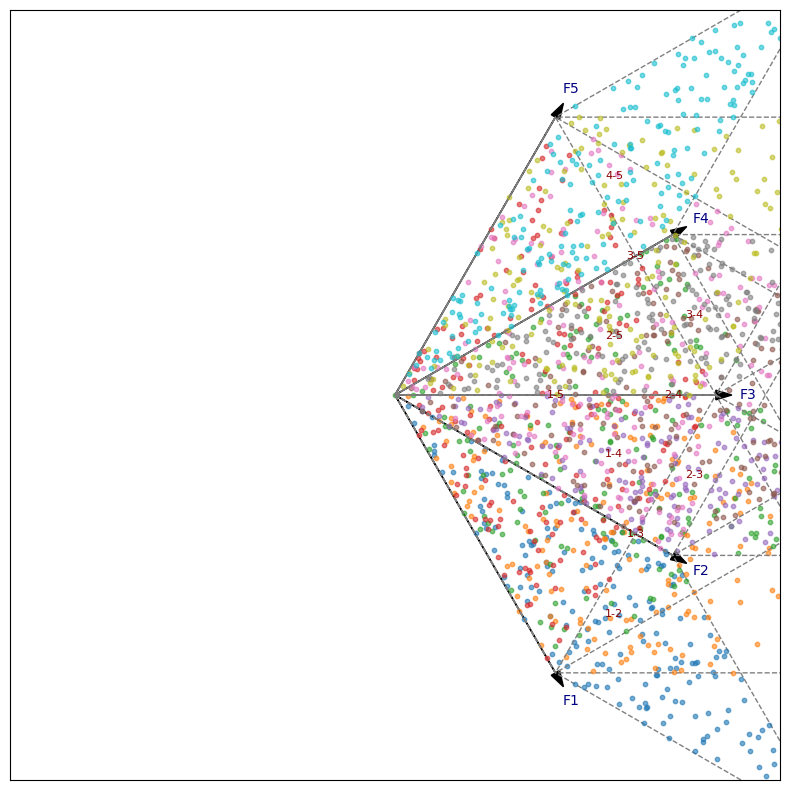

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.preprocessing import MinMaxScaler

# ---------------------------
# Settings and synthetic data
# ---------------------------
np.random.seed(42)
n_samples = 200
k = 5  # number of dimensions; we will have 5 edges and 10 faces

# Generate synthetic high-dimensional data (each feature is random)
data = np.random.rand(n_samples, k)

# Normalize each feature to [0, 1] (data is already in this range, but included for clarity)
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data)

# ---------------------------------------
# Define edge vectors in a restricted arc
# ---------------------------------------
# Choose an arc spanning theta_range degrees (< 180°). For example, 120°.
theta_range = np.radians(120)  # in radians
# We will center the arc about 0 (so from -theta_range/2 to theta_range/2).
start_angle = -theta_range / 2
end_angle = theta_range / 2

# Compute k equally spaced angles within that arc.
angles = np.linspace(start_angle, end_angle, k)
# Each edge vector is a unit vector pointing in that angle.
edges = np.array([[np.cos(theta), np.sin(theta)] for theta in angles])

# ------------------------------------------
# Prepare the figure for plotting hyperbox
# ------------------------------------------
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
# ax.set_title("Hyperbox Plot for 5-D Data\n(Each face shows the 2D projection of a variable pair)", fontsize=12)

# Optionally, draw the edge vectors (the "radii" of the hyperbox)
origin = np.array([0, 0])
for i, vec in enumerate(edges):
    ax.arrow(origin[0], origin[1], vec[0], vec[1], head_width=0.03, head_length=0.05, fc='black', ec='black')
    # Label the edge with the feature name (or index)
    label_pos = 1.1 * vec
    ax.text(label_pos[0], label_pos[1], f"F{i+1}", fontsize=10, ha='center', va='center', color='navy')

# ---------------------------------------------------------
# Function: project a pair of features onto the parallelogram
# ---------------------------------------------------------
def project_to_face(a, b, edge_i, edge_j):
    """
    Map a point with coordinates (a,b) in [0,1]^2 onto the parallelogram spanned by edge_i and edge_j.
    """
    return a * edge_i + b * edge_j

# -----------------------------------------
# Plot each face (each pair of variables)
# -----------------------------------------
# There are k(k-1)/2 unique pairs (faces)
face_idx = 0
for i in range(k):
    for j in range(i + 1, k):
        # For each face, define the parallelogram corners:
        # Origin, edge_i, edge_j, and edge_i + edge_j.
        corner0 = origin
        corner_i = edges[i]
        corner_j = edges[j]
        corner_sum = edges[i] + edges[j]
        # Draw the parallelogram (face boundary)
        face_patch = patches.Polygon([corner0, corner_i, corner_sum, corner_j],
                                     closed=True, edgecolor='gray', facecolor='none', linestyle='--', linewidth=1)
        ax.add_patch(face_patch)

        # Scatter plot of the data projected on the (i,j) face.
        # For every data point, use feature i and j (which are in [0,1]).
        face_points = np.array([project_to_face(a, b, edges[i], edges[j]) for a, b in zip(data_norm[:, i], data_norm[:, j])])
        ax.scatter(face_points[:, 0], face_points[:, 1], s=10, alpha=0.6, label=f"Face {i+1}-{j+1}" if face_idx==0 else "")
        face_idx += 1
        # Optionally, you can label the face near the center of the parallelogram.
        face_center = (corner0 + corner_i + corner_j + corner_sum) / 4
        ax.text(face_center[0], face_center[1], f"{i+1}-{j+1}", fontsize=8, color='darkred', ha='center', va='center')

# Remove ticks for clarity.
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()


## Radar (Spider) Charts

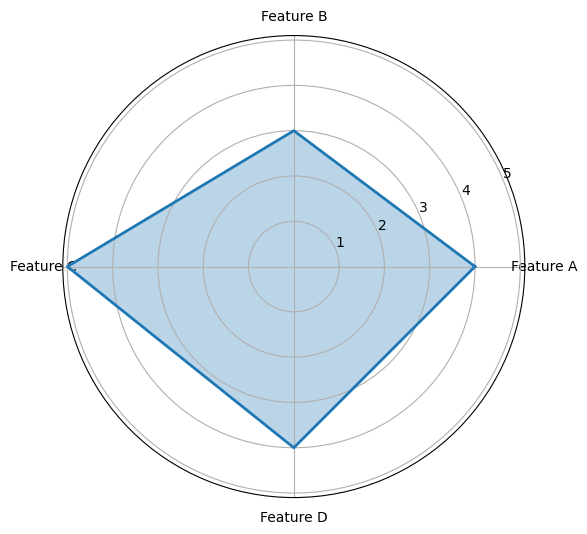

In [32]:
import numpy as np

# Example data for three items (e.g., three different products)
categories = ['Feature A', 'Feature B', 'Feature C', 'Feature D']
values = [4, 3, 5, 4]

# Number of variables
N = len(categories)

# Compute angle of each axis in the plot (in radians)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # complete the circle

# Append the first value to the end so the polygon closes
values += values[:1]

# Plotting
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], categories)
ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, alpha=0.3)
plt.show()

# Glyph-Based Techniques

## Chernoff faces

In [47]:
!pip install ChernoffFace

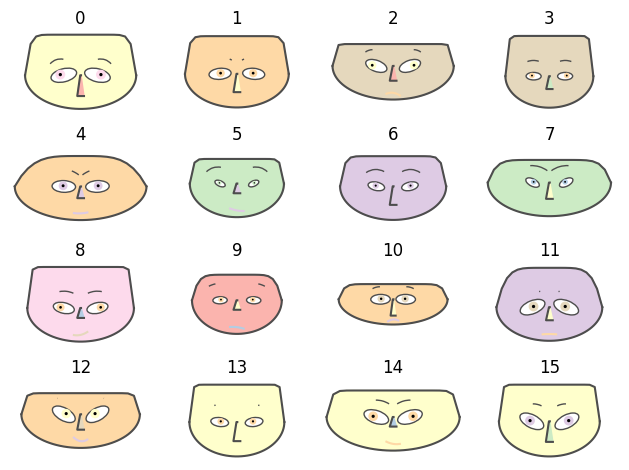

In [52]:
from ChernoffFace import *
import numpy
import matplotlib.cm

# Generate data
np.random.seed(32)
data = np.random.rand(16, 12)

# Make Chernoff faces
fig = chernoff_face(data=data,
                    titles=[str(x) for x in list(range(len(data)))],
                    color_mapper=matplotlib.cm.Pastel1)

# Display
fig.tight_layout()
matplotlib.pyplot.show()

# Pixel-oriented Techniques

## Heatmaps

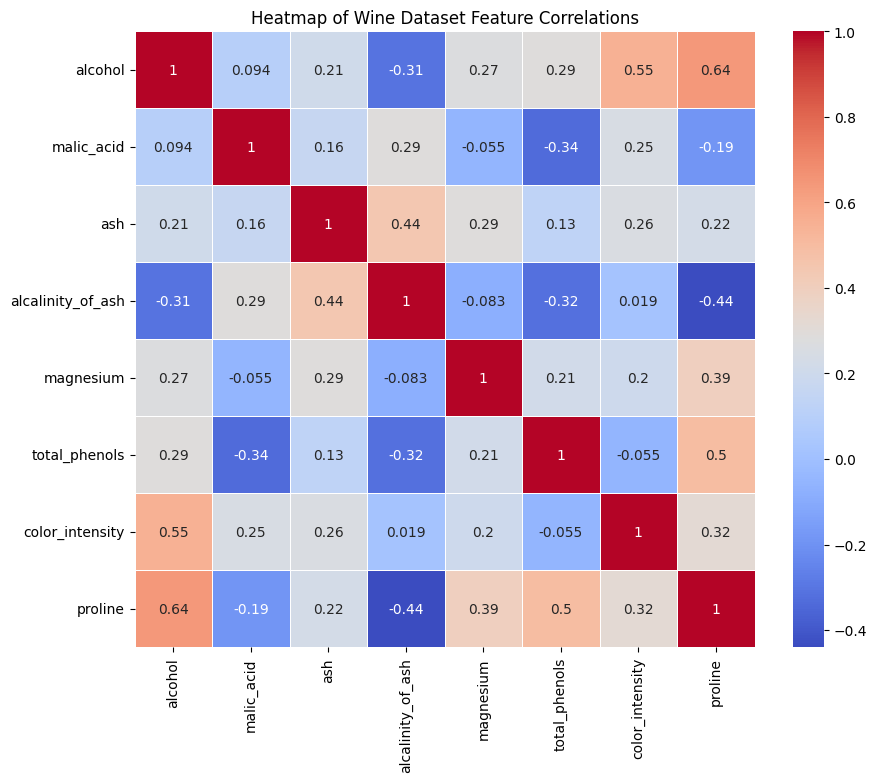

In [16]:
import seaborn as sns
import numpy as np

# Compute the correlation matrix for the wine dataset
corr_matrix = wine_df.drop('target', axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Wine Dataset Feature Correlations")
plt.show()

## Data-to-Pixel Mapping and Recursive Patterns

In [35]:
!pip install hilbertcurve

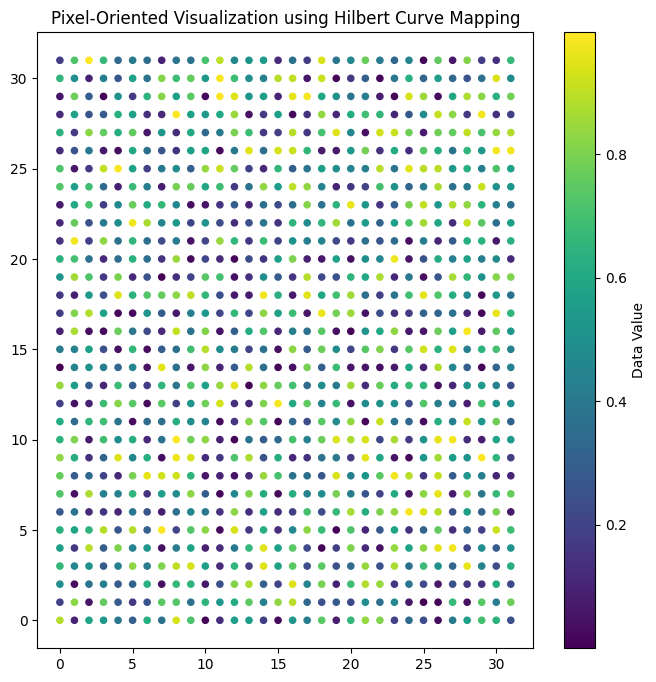

In [41]:
# Install with: pip install hilbertcurve
from hilbertcurve.hilbertcurve import HilbertCurve
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic high-dimensional data: 1024 data values
data = np.random.rand(1024)

# Use a Hilbert curve of order 5 in 2D (since 2^(5*2) = 1024)
p = 5  # order
n = 2  # dimensions
hilbert_curve = HilbertCurve(p, n)

points = hilbert_curve.points_from_distances(range(1024))
points = np.array(points)

plt.figure(figsize=(8, 8))
plt.scatter(points[:,0], points[:,1], c=data, cmap='viridis', s=20)
plt.title("Pixel-Oriented Visualization using Hilbert Curve Mapping")
plt.colorbar(label='Data Value')
plt.show()

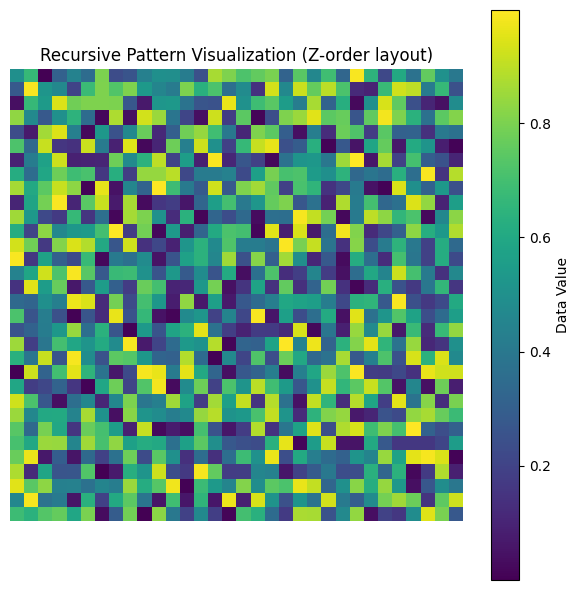

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def interleave_bits(x, y):
    """Convert 2D coordinates to 1D Z-order curve index."""
    z = 0
    for i in range(16):
        z |= ((x >> i) & 1) << (2 * i + 0)
        z |= ((y >> i) & 1) << (2 * i + 1)
    return z

def morton_order_grid(n):
    """Generate a grid in Morton (Z-order) pattern for n x n image."""
    grid = np.zeros((n, n), dtype=int)
    coords = [(x, y) for x in range(n) for y in range(n)]
    sorted_coords = sorted(coords, key=lambda xy: interleave_bits(xy[0], xy[1]))
    for i, (x, y) in enumerate(sorted_coords):
        grid[y, x] = i  # row-major
    return grid

# Create synthetic data
n = 32  # image dimension: must be power of 2 for proper recursion
data_size = n * n
data = np.random.rand(data_size)

# Get Morton-ordered grid
order_grid = morton_order_grid(n)

# Rearrange data according to Z-order
pixel_values = np.zeros_like(data)
for y in range(n):
    for x in range(n):
        idx = order_grid[y, x]
        pixel_values[idx] = data[y * n + x]

# Reshape for image display
image = pixel_values.reshape(n, n)

# Plot
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='viridis')
plt.title('Recursive Pattern Visualization (Z-order layout)')
plt.axis('off')
plt.colorbar(label='Data Value')
plt.tight_layout()
plt.show()

## Circle Segments Technique

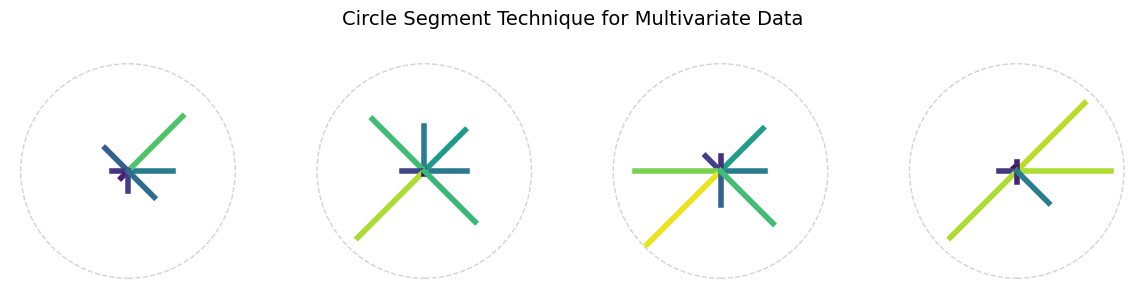

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def draw_circle_segment(ax, data, max_value=1.0, cmap=plt.cm.viridis):
    num_vars = len(data)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)

    for i, (angle, value) in enumerate(zip(angles, data)):
        # Normalize value to [0, 1] range for plotting
        norm_value = value / max_value
        x = [0, np.cos(angle) * norm_value]
        y = [0, np.sin(angle) * norm_value]
        ax.plot(x, y, lw=4, color=cmap(norm_value))  # Colored segment line

    # Draw circle frame
    circle = plt.Circle((0, 0), 1, color='lightgray', fill=False, linestyle='--')
    ax.add_artist(circle)

    # Aesthetic adjustments
    ax.set_aspect('equal')
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.axis('off')

# Example: generate some multivariate data
np.random.seed(1)
num_samples = 4
num_features = 8
data_matrix = np.random.rand(num_samples, num_features)

# Plot multiple circle segment visuals
fig, axes = plt.subplots(1, num_samples, figsize=(12, 3))

for i, ax in enumerate(axes):
    draw_circle_segment(ax, data_matrix[i], max_value=1.0)

plt.suptitle("Circle Segment Technique for Multivariate Data", fontsize=14)
plt.tight_layout()
plt.show()


## Pixel bar chart

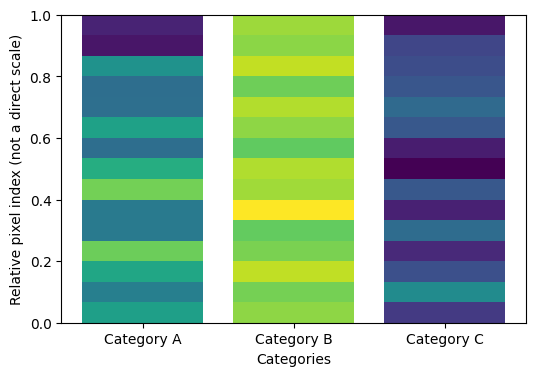

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def pixel_bar_chart(categories, data_per_category, bar_width=0.8):
    """
    Creates a pixel bar chart.

    Parameters:
    -----------
    categories : list of str
        Category names.
    data_per_category : list of 1D numpy arrays
        Each element in the list corresponds to one category
        and contains the data values to be visualized as pixels.
    bar_width : float, optional
        Width of each pixel bar in x-dimension.
    """
    # Flatten all data to find global min and max for color scaling
    all_data = np.concatenate(data_per_category)
    dmin, dmax = all_data.min(), all_data.max()

    # Normalize function: maps data to [0, 1] for color
    normalize = lambda x: (x - dmin) / (dmax - dmin) if dmax != dmin else 0.5

    # Start a figure
    plt.figure(figsize=(6, 4))  # You can change the figure size as needed

    num_categories = len(categories)

    for i, cat in enumerate(categories):
        data = data_per_category[i]
        N = len(data)

        # Optional: sort data within the category to reveal gradient better
        # data = np.sort(data)

        # Each pixel's vertical size
        delta_h = 1.0 / N

        # Plot each data point as a small rectangle
        for j in range(N):
            val = data[j]
            color_val = normalize(val)
            # Convert this to an RGBA color
            # (We use a default colormap from matplotlib, e.g. "viridis")
            # You could also do: plt.cm.coolwarm(color_val), etc.
            color = plt.cm.viridis(color_val)

            # Coordinates for the rectangle
            # x from (i - bar_width/2) to (i + bar_width/2)
            # y from (j*delta_h) to ((j+1)*delta_h)
            x_left = i - bar_width / 2
            x_right = i + bar_width / 2
            y_bottom = j * delta_h
            y_top = (j + 1) * delta_h

            # Draw rectangle
            plt.fill(
                [x_left, x_right, x_right, x_left],
                [y_bottom, y_bottom, y_top, y_top],
                color=color,
                linewidth=0  # no border
            )

    # Labeling the axes
    plt.xticks(range(num_categories), categories)  # Place category labels at x positions
    plt.ylim(0, 1)  # The bars fill [0..1] in y for each category
    plt.xlabel('Categories')
    plt.ylabel('Relative pixel index (not a direct scale)')
    # plt.title('Simple Pixel Bar Chart Example')

    # Display the chart
    plt.show()


# Example usage
if __name__ == "__main__":
    # Suppose we have 3 categories
    categories = ["Category A", "Category B", "Category C"]

    # For each category, generate some random values
    np.random.seed(42)  # for reproducibility
    data_A = np.random.randn(15) * 5 + 10  # e.g., 15 random points
    data_B = np.random.randn(15) * 2 + 20
    data_C = np.random.randn(15) * 3 + 5

    data_per_category = [data_A, data_B, data_C]

    # Draw the pixel bar chart
    pixel_bar_chart(categories, data_per_category, bar_width=0.8)

# Graph based Visualization

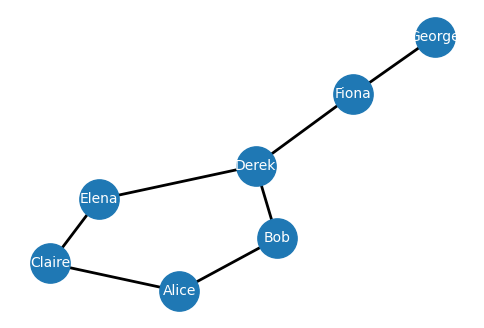

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

def create_and_draw_node_link_diagram():
    """
    Create and visualize a simple node-link diagram using NetworkX and matplotlib.
    """
    # 1. Define a simple graph: nodes and edges
    #    You could also read this from a file, adjacency list, or other source.
    edges = [
        ("Alice", "Bob"),
        ("Alice", "Claire"),
        ("Bob", "Derek"),
        ("Claire", "Elena"),
        ("Derek", "Elena"),
        ("Derek", "Fiona"),
        ("Fiona", "George")
    ]

    # 2. Create the graph object and add edges
    G = nx.Graph()
    G.add_edges_from(edges)

    # 3. Choose a layout for node positions; spring_layout is force-directed
    pos = nx.spring_layout(G, seed=42)  # seed ensures reproducibility

    # 4. Draw the graph
    plt.figure(figsize=(6, 4))

    # Draw nodes
    nx.draw_networkx_nodes(
        G,
        pos,
        node_size=800
    )

    # Draw edges
    nx.draw_networkx_edges(
        G,
        pos,
        width=2
    )

    # Draw labels
    nx.draw_networkx_labels(
        G,
        pos,
        font_size=10,
        font_color="white"
    )

    # Remove axes for a cleaner look
    plt.axis("off")
    # plt.title("Example Node-Link Diagram")
    plt.show()

if __name__ == "__main__":
    create_and_draw_node_link_diagram()

## Adjancency Matrix

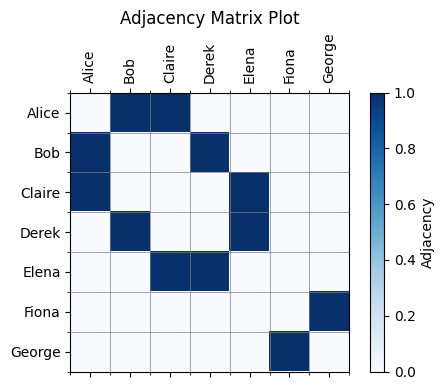

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def plot_adjacency_matrix(G):
    """
    Given a NetworkX graph G, compute and plot its adjacency matrix.
    Rows and columns will be ordered by the sorted list of nodes in G.
    """
    # Sort nodes so adjacency matrix is consistently ordered
    nodes = sorted(G.nodes())

    # Convert to adjacency matrix (numpy array)
    # 'nodelist=nodes' ensures the rows/columns match 'nodes' order.
    A = nx.to_numpy_array(G, nodelist=nodes, dtype=int)

    # Plot adjacency matrix
    fig, ax = plt.subplots(figsize=(6, 4))
    cax = ax.matshow(A, cmap=plt.cm.Blues)  # You can choose another colormap

    # Add a colorbar to interpret values (0 or 1, if unweighted)
    fig.colorbar(cax, fraction=0.046, pad=0.04, label='Adjacency')

    # Set the ticks to correspond to each node
    ax.set_xticks(range(len(nodes)))
    ax.set_yticks(range(len(nodes)))
    ax.set_xticklabels(nodes, rotation=90)  # rotate labels if long
    ax.set_yticklabels(nodes)

    # Optionally add gridlines (for clarity)
    ax.set_xticks(np.arange(-0.5, len(nodes), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(nodes), 1), minor=True)
    ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5)

    plt.title("Adjacency Matrix Plot")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Example: create a small graph
    edges = [
        ("Alice", "Bob"),
        ("Alice", "Claire"),
        ("Bob", "Derek"),
        ("Claire", "Elena"),
        ("Elena", "Derek"),
        ("Fiona", "George")  # separate component
    ]

    G = nx.Graph()
    G.add_edges_from(edges)

    # Plot the adjacency matrix
    plot_adjacency_matrix(G)

## Force directed layout graph

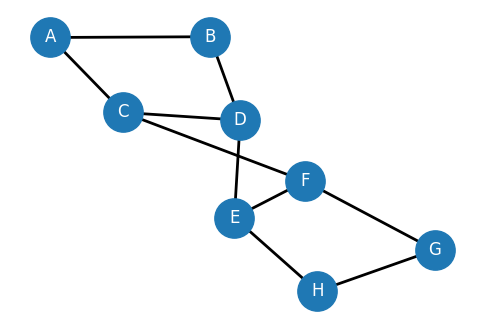

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

def create_and_draw_force_directed_graph():
    """
    Create a graph, compute a force-directed layout, and draw it with matplotlib.
    """
    # 1. Define a sample set of edges (undirected)
    edges = [
        ("A", "B"),
        ("A", "C"),
        ("B", "D"),
        ("C", "D"),
        ("D", "E"),
        ("C", "F"),
        ("E", "F"),
        ("F", "G"),
        ("H", "G"),
        ("H", "E")  # Some cross-links to make the structure interesting
    ]

    # 2. Create the Graph object and add the edges
    G = nx.Graph()
    G.add_edges_from(edges)

    # 3. Use a force-directed layout (spring_layout) to compute positions
    #    The seed ensures reproducibility of the layout
    pos = nx.spring_layout(G, seed=42)

    # 4. Draw the graph
    plt.figure(figsize=(6, 4))

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=800)

    # Draw edges
    nx.draw_networkx_edges(G, pos, width=2)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_color="white")

    # Remove axes for a cleaner look
    plt.axis("off")
    # plt.title("Force-Directed Layout (Spring Layout) Example")

    # Display the graph
    plt.show()

if __name__ == "__main__":
    create_and_draw_force_directed_graph()

## Radial Layouts

### Radial Tree Layout

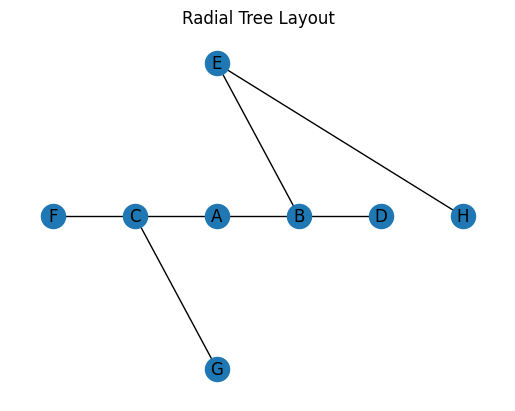

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import math

def radial_tree_layout(G, root=None, layer_gap=1.0):
    """
    Compute a radial layout for a tree rooted at 'root'.
    Each BFS layer is placed on a concentric circle of increasing radius.
    """
    if root is None:
        # If no root specified, pick an arbitrary node
        root = list(G.nodes())[0]

    # BFS to find layers
    visited = {root}
    queue = deque([(root, 0)])  # (node, layer)
    layers = {}  # layer_index -> list of nodes
    max_layer = 0

    while queue:
        node, layer = queue.popleft()
        if layer not in layers:
            layers[layer] = []
        layers[layer].append(node)
        max_layer = max(max_layer, layer)

        for nbr in G.neighbors(node):
            if nbr not in visited:
                visited.add(nbr)
                queue.append((nbr, layer + 1))

    # Assign positions
    pos = {}
    for layer_idx, nodes_in_layer in layers.items():
        radius = layer_gap * layer_idx
        n = len(nodes_in_layer)
        for i, node in enumerate(nodes_in_layer):
            angle = 2.0 * math.pi * i / n if n > 1 else 0
            x = radius * math.cos(angle)
            y = radius * math.sin(angle)
            pos[node] = (x, y)

    return pos

def draw_radial_tree_layout():
    # Create a small tree
    edges = [
        ("A", "B"), ("A", "C"),
        ("B", "D"), ("B", "E"),
        ("C", "F"), ("C", "G"),
        ("E", "H")
    ]
    G = nx.Graph()
    G.add_edges_from(edges)

    # Compute a radial layout around root "A"
    pos = radial_tree_layout(G, root="A", layer_gap=1.5)

    # Draw
    plt.figure()
    nx.draw_networkx(G, pos=pos)
    plt.title("Radial Tree Layout")
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    draw_radial_tree_layout()

### Circular Node-Link Layout

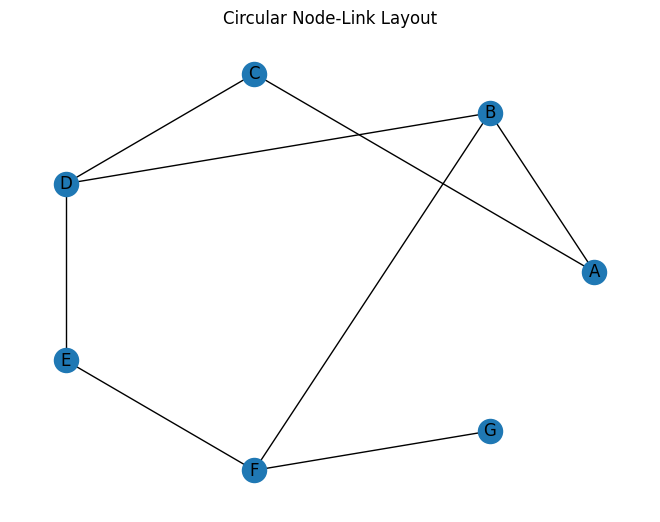

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_circular_layout():
    # Example graph
    edges = [
        ("A", "B"),
        ("A", "C"),
        ("B", "D"),
        ("C", "D"),
        ("D", "E"),
        ("E", "F"),
        ("B", "F"),
        ("G", "F")
    ]

    G = nx.Graph()
    G.add_edges_from(edges)

    # Compute circular layout
    pos = nx.circular_layout(G)

    # Draw
    plt.figure()
    nx.draw(G, pos=pos, with_labels=True)
    plt.title("Circular Node-Link Layout")
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    draw_circular_layout()

### Chord Diagram

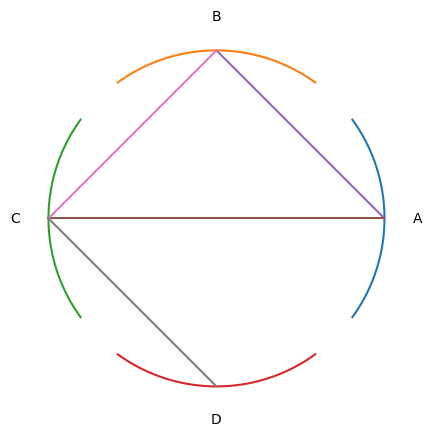

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def chord_diagram(adj_matrix, labels):
    """
    Draw a minimal chord diagram for the given adjacency matrix (undirected).
    Each node is assigned an arc on the circle, chords are drawn for nonzero entries.

    Parameters
    ----------
    adj_matrix : 2D numpy array
        Symmetric adjacency matrix
    labels : list of str
        Node labels corresponding to rows/columns of adj_matrix
    """
    n = len(labels)
    # Angles for each node's arc center
    theta = np.linspace(0, 2*np.pi, n, endpoint=False)
    # We'll define an arc from theta[i] - half_delta to theta[i] + half_delta
    arc_width = 2*np.pi / n * 0.8  # smaller than the gap between nodes
    half_arc = arc_width / 2

    fig = plt.figure()
    ax = plt.gca()
    ax.set_aspect("equal")
    plt.axis("off")

    # Draw arcs for each node
    for i in range(n):
        arc_start = theta[i] - half_arc
        arc_end = theta[i] + half_arc
        # Discretize arc into points
        arc_points = np.linspace(arc_start, arc_end, 50)
        x_arc = np.cos(arc_points)
        y_arc = np.sin(arc_points)
        plt.plot(x_arc, y_arc)  # arcs in default color

        # Label near the midpoint
        mid_angle = theta[i]
        label_radius = 1.2  # put labels slightly outside the circle
        x_label = label_radius * np.cos(mid_angle)
        y_label = label_radius * np.sin(mid_angle)
        plt.text(x_label, y_label, labels[i],
                 ha="center", va="center")

    # Draw chords for each pair (i,j) if adj_matrix[i,j] != 0
    # We'll just connect node i and node j with a line or curve
    # For simplicity, draw a straight line in polar coordinates
    for i in range(n):
        for j in range(i+1, n):
            if adj_matrix[i, j] != 0:
                # Start angle = theta[i], end angle = theta[j]
                x1, y1 = np.cos(theta[i]), np.sin(theta[i])
                x2, y2 = np.cos(theta[j]), np.sin(theta[j])
                # A direct line
                plt.plot([x1, x2], [y1, y2])

    # plt.title("Minimal Chord Diagram")
    plt.show()

def example_chord_diagram():
    # Example adjacency matrix for 4 nodes
    # Suppose we have edges: A-B, A-C, B-C, C-D (just an example)
    # We'll represent that as a symmetric matrix
    A = np.array([
        [0, 1, 1, 0],  # A
        [1, 0, 1, 0],  # B
        [1, 1, 0, 1],  # C
        [0, 0, 1, 0]   # D
    ])
    labels = ["A", "B", "C", "D"]
    chord_diagram(A, labels)

if __name__ == "__main__":
    example_chord_diagram()

# Hierarchy-Based Techniques

## Treemaps

In [22]:
!pip install squarify

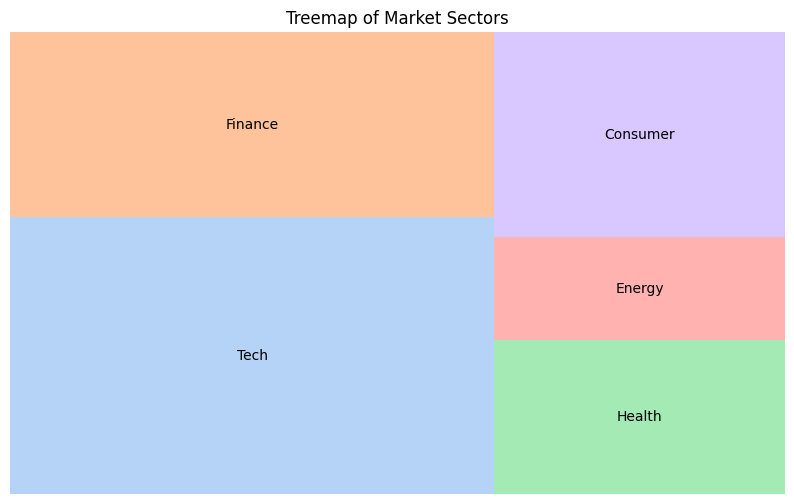

In [23]:
import squarify
import matplotlib.pyplot as plt

# Example hierarchical data: categories and their values (e.g., market capitalization)
categories = ['Tech', 'Finance', 'Health', 'Energy', 'Consumer']
values = [450, 300, 150, 100, 200]

plt.figure(figsize=(10, 6))
squarify.plot(sizes=values, label=categories, color=sns.color_palette("pastel"), alpha=.8)
plt.axis('off')
plt.title("Treemap of Market Sectors")
plt.show()

## Sunburst Charts

In [24]:
import plotly.express as px
import pandas as pd

# Example hierarchical dataset: a DataFrame with path and value columns
data = pd.DataFrame({
    "path": [
        "World/Asia/China",
        "World/Asia/India",
        "World/Europe/Germany",
        "World/Europe/France",
        "World/Americas/USA",
        "World/Americas/Canada"
    ],
    "value": [1400, 1300, 80, 65, 330, 38]
})

# Split path into separate columns for Plotly sunburst
data[['continent', 'country_group', 'country']] = data['path'].str.split('/', expand=True)

fig = px.sunburst(data, path=['continent', 'country_group', 'country'], values='value',
                  color='value', color_continuous_scale='RdBu')
fig.update_layout(title="Sunburst Chart of World Population (Example)")
fig.show()

## Node-Link Diagrams and Dendrograms

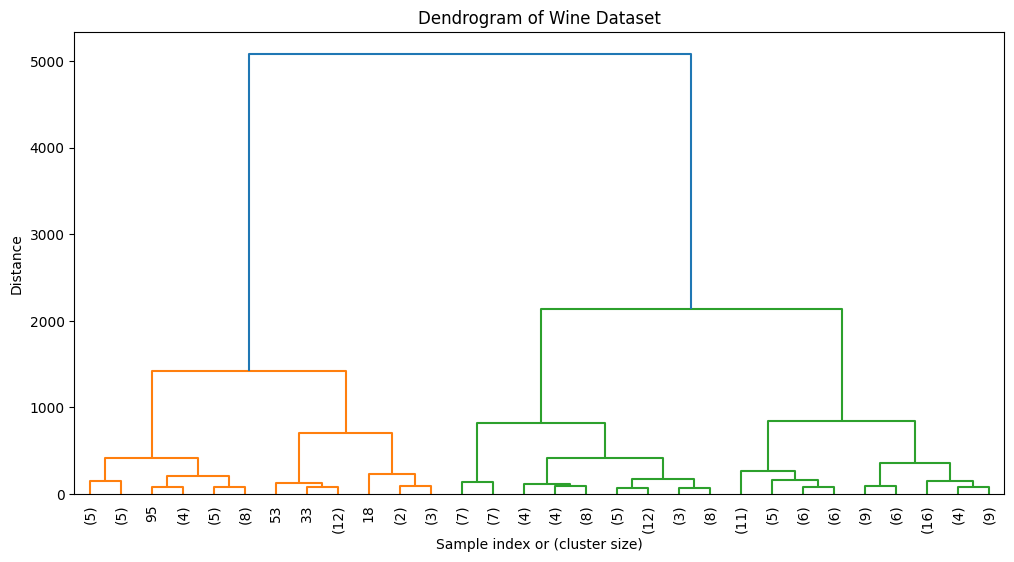

In [25]:
import scipy.cluster.hierarchy as sch

# Using the wine dataset (excluding the target)
data = wine_df.drop('target', axis=1).values

# Compute the linkage matrix using the Euclidean distance and Ward’s method
linkage_matrix = sch.linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90.)
plt.title("Dendrogram of Wine Dataset")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.show()

## Topology based

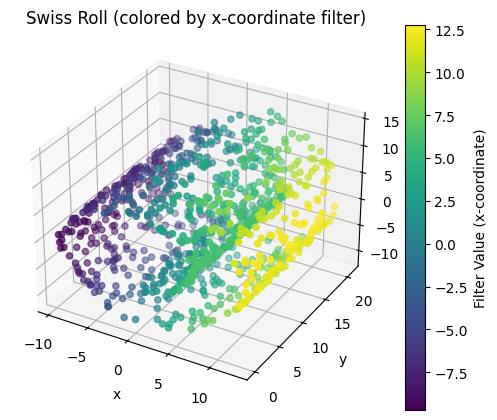

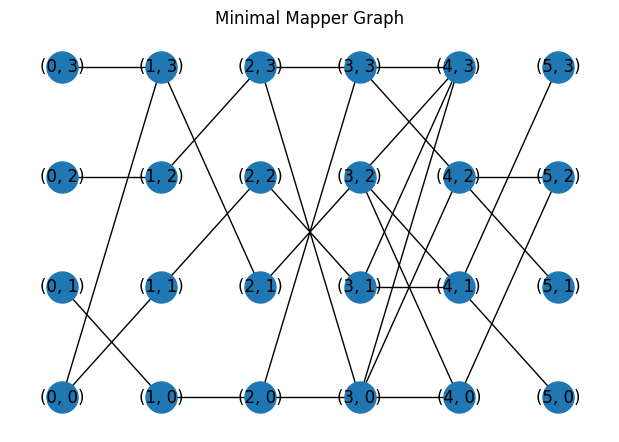

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.cluster import KMeans
import networkx as nx

def mapper_algorithm(data, filter_values, n_intervals=5, overlap=0.1, n_clusters=3):
    """
    Perform a minimal 'Mapper-like' procedure on the given data.

    Parameters:
    -----------
    data : numpy.ndarray
        The dataset, shape (n_samples, dim).
    filter_values : numpy.ndarray
        One-dimensional array of length n_samples,
        representing the filter function f(x_i).
    n_intervals : int
        Number of intervals in the filter's cover.
    overlap : float
        Fraction of overlap between adjacent intervals (0 < overlap < 1).
    n_clusters : int
        Number of clusters to find in each interval subset (via KMeans).

    Returns:
    --------
    G : networkx.Graph
        A graph whose nodes are (interval_index, cluster_index).
        Two nodes are connected if they share at least one data point.
    cover_intervals : list of tuples
        The intervals used in the cover.
    cluster_memberships : dict
        Keys are (interval_index, cluster_label), values are lists of point indices.
    """
    # 1. Determine the range of filter values
    f_min, f_max = filter_values.min(), filter_values.max()
    total_length = f_max - f_min
    step = total_length / n_intervals

    # 2. Build intervals with overlap
    # For i = 0..(n_intervals - 1), the i-th interval is [start, end].
    # Overlap is "overlap * step" on each side except the last.
    cover_intervals = []
    for i in range(n_intervals):
        start = f_min + i * step
        end = f_min + (i+1) * step
        # expand by overlap on left and right if possible
        # but ensure we don't exceed [f_min, f_max]
        interval_length = end - start
        overlap_length = overlap * interval_length
        # shift start backward (unless i == 0) and end forward (unless i == n_intervals - 1)
        if i > 0:
            start -= overlap_length
        if i < n_intervals - 1:
            end += overlap_length
        cover_intervals.append((start, end))

    # 3. For each interval, subset data and cluster
    cluster_memberships = {}
    for i, (left, right) in enumerate(cover_intervals):
        # Indices for points in [left, right]
        in_interval = np.where((filter_values >= left) & (filter_values <= right))[0]
        subset = data[in_interval]

        if len(subset) == 0:
            continue

        # Cluster this subset
        # (In real TDA, we might pick the number of clusters dynamically)
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(subset)

        for clust_label in range(n_clusters):
            indices_this_cluster = in_interval[labels == clust_label]
            if len(indices_this_cluster) > 0:
                cluster_memberships[(i, clust_label)] = indices_this_cluster

    # 4. Build the graph
    G = nx.Graph()

    # Add a node for each (interval_index, cluster_label)
    for node_key in cluster_memberships.keys():
        G.add_node(node_key)

    # Connect nodes that share data points
    # Only need to compare intervals i and i+1 to find overlaps
    for i in range(n_intervals-1):
        for clust_label1 in range(n_clusters):
            node1 = (i, clust_label1)
            if node1 not in cluster_memberships:
                continue

            indices_1 = set(cluster_memberships[node1])
            # Compare to all clusters in interval i+1
            for clust_label2 in range(n_clusters):
                node2 = (i+1, clust_label2)
                if node2 not in cluster_memberships:
                    continue
                indices_2 = set(cluster_memberships[node2])
                if len(indices_1.intersection(indices_2)) > 0:
                    G.add_edge(node1, node2)

    return G, cover_intervals, cluster_memberships

if __name__ == "__main__":
    # 1. Generate a Swiss roll dataset
    n_samples = 1000
    X, t = make_swiss_roll(n_samples=n_samples, noise=0.1, random_state=42)
    # X.shape = (1000, 3)  ;  t.shape = (1000,)
    # t is related to the 'unrolled' coordinate of the Swiss roll but we can define our own filter.

    # 2. Define a simple filter function f(x, y, z) = x (the first coordinate)
    filter_vals = X[:, 0]  # 1D array of length n_samples

    # 3. Run the minimal mapper-like algorithm
    G, intervals, clusters = mapper_algorithm(
        data=X,
        filter_values=filter_vals,
        n_intervals=6,    # number of overlapping intervals
        overlap=0.2,      # fraction of overlap
        n_clusters=4      # cluster each interval into 4 clusters
    )

    # --- Visualization Part ---
    # A) 3D scatter of the Swiss Roll colored by the filter
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(projection='3d')
    sc = ax.scatter(X[:,0], X[:,1], X[:,2], c=filter_vals)
    ax.set_title("Swiss Roll (colored by x-coordinate filter)")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.colorbar(sc, label="Filter Value (x-coordinate)")
    plt.show()

    # B) Mapper Graph Visualization (nodes = clusters, edges = overlap)
    # Node positions in a simple 2D layout
    # We place intervals on x-axis and cluster labels on y-axis for a rough layout
    pos = {}
    for (i, clust_label) in G.nodes():
        pos[(i, clust_label)] = (i, clust_label)

    plt.figure(figsize=(6,4))
    nx.draw(G, pos, with_labels=True, node_size=500)
    plt.title("Minimal Mapper Graph")
    plt.xlabel("Interval index")
    plt.ylabel("Cluster index")
    plt.show()

# Unconventional Visualization Techniques

## Mosaic Plots

<Figure size 1000x600 with 0 Axes>

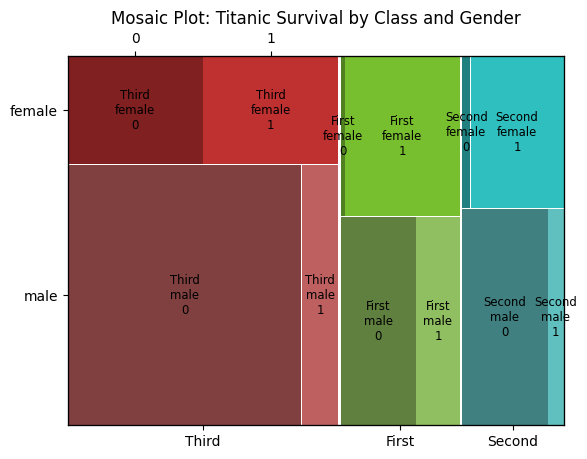

In [26]:
from statsmodels.graphics.mosaicplot import mosaic

# Example: mosaic plot of Titanic survival by gender and class.
import pandas as pd
titanic = sns.load_dataset("titanic").dropna(subset=['class', 'sex', 'survived'])
titanic['survived'] = titanic['survived'].astype(str)

plt.figure(figsize=(10, 6))
mosaic(titanic, index=['class', 'sex', 'survived'], title='Mosaic Plot: Titanic Survival by Class and Gender')
plt.show()

## Matrix Reordering and Enhanced Matrix Plots

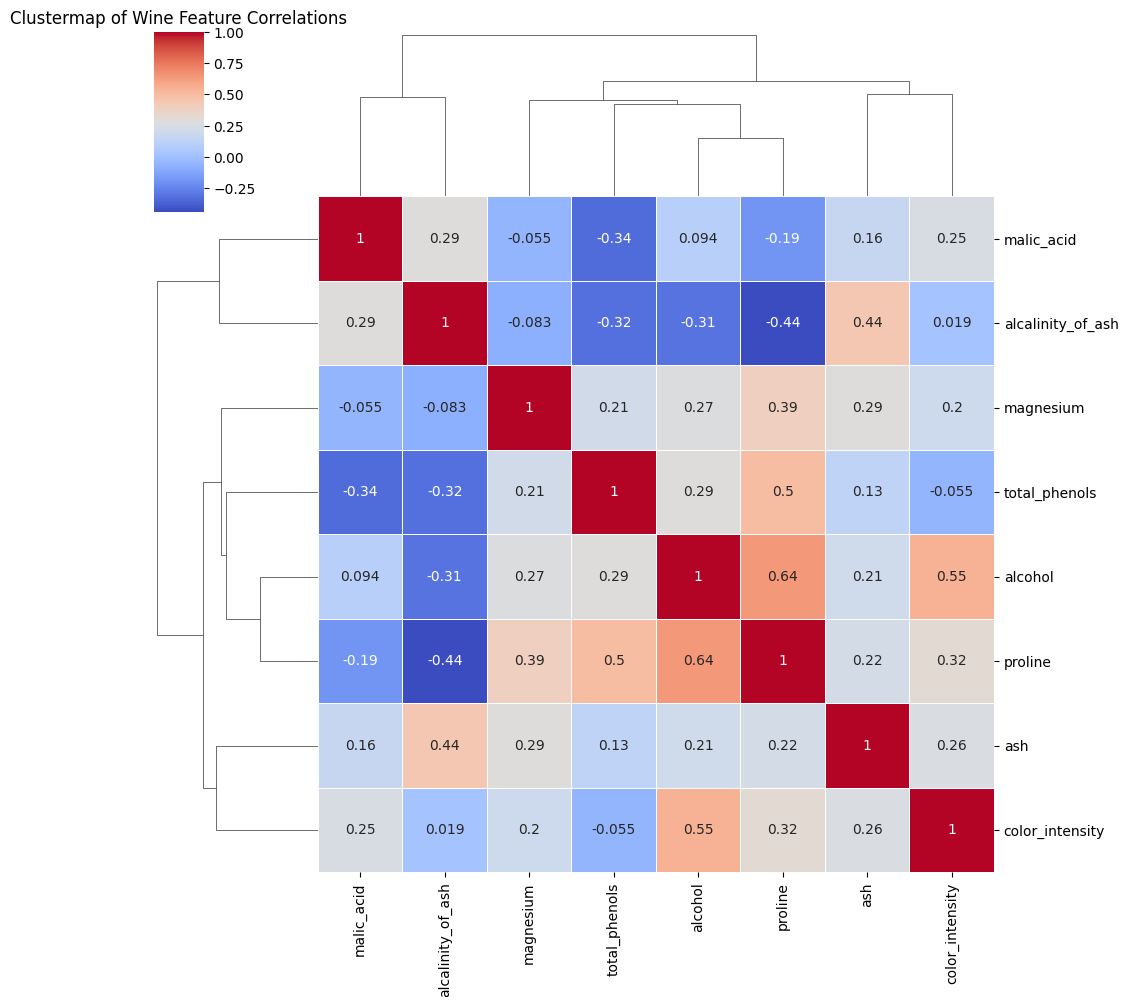

In [27]:
# Compute a correlation matrix of wine data features
corr = wine_df.drop('target', axis=1).corr()

# Create a clustermap of the correlation matrix
sns.clustermap(corr, cmap='coolwarm', linewidths=0.5, annot=True)
plt.title("Clustermap of Wine Feature Correlations")
plt.show()

## Density-Preserving Projections

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



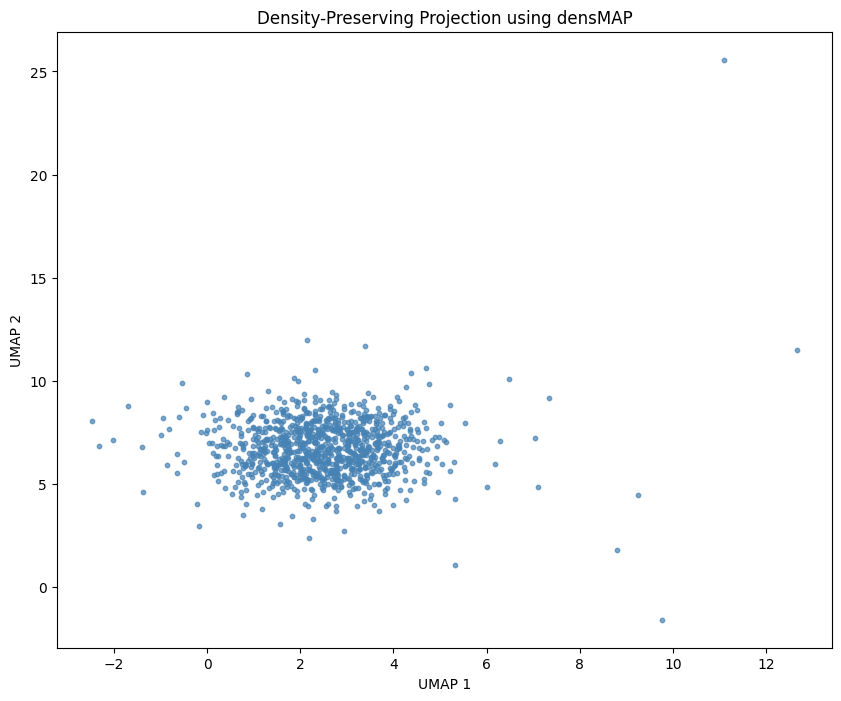

In [31]:
import umap.umap_ as umap

# Generate synthetic high-dimensional data (e.g., 1000 samples in 50 dimensions)
X = np.random.rand(1000, 50)

# Create a UMAP reducer with densMAP enabled
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, densmap=True)
embedding = reducer.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(embedding[:,0], embedding[:,1], c='steelblue', s=10, alpha=0.7)
plt.title("Density-Preserving Projection using densMAP")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()